Fundamental Theorem of Calculus: The area under a curve is equal to the difference in antiderivatives at two points.

Something that every student or individual with long demanding hours at their job can relate to is how our attention and productivity deteriorates over time when working on homework, a project, or in a meeting. This is also known as decreasing marginal productivity because our productivity decreases at an increasing rate with each additional consecutive minute. To demonstrate the effect, productivity is set to the arbitrary equation: SQRT(x/2) where x = time in minutes. The following Python script analyzes how our marginal productivity changes with respect to 20 minute intervals of a 100 minute timespan. 

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [2]:
Rational(-2/3)

-6004799503160661/9007199254740992

In [31]:
# set up variables 
x = Symbol('x')
xrange = np.arange(0,100,1)
# used for dividing by 0 error in xrange within chart
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [32]:
# productivitve function 
productivity = (sqrt(x/2))
# productivitve function - lambdify
productivity_fn = lambdify(x,productivity,'numpy')
# marginal productivity function
marginal_productivity = productivity.diff(x)
# marginal productivity function - - lambdify
marginal_productivity_fn = lambdify(x,productivity.diff(x),'numpy')

In [34]:
print('Marginal Productivity:')
productivity.diff(x)

Marginal Productivity:


sqrt(2)/(4*sqrt(x))

In [35]:
print('Productivity:')
integrate(marginal_productivity)

Productivity:


sqrt(2)*sqrt(x)/2

Minutes 0 - 20: 3.1622776601683795
Minutes 20 - 40: 1.3098582948312
Minutes 40 - 60: 1.0050896200520825
Minutes 60 - 80: 0.847329745285097
Minutes 80 - 100: 0.7465124915287165


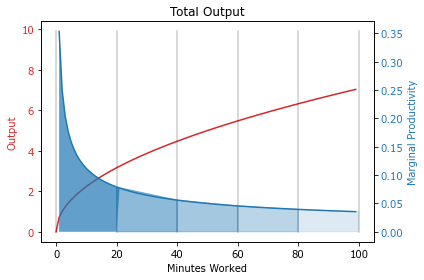

In [36]:
x  = xrange 
y0 = np.arange(0,10,0.1)
y  = productivity_fn(xrange)
y1 = marginal_productivity_fn(xrange)

# set up 20 minute interval bounds
b0   = 0+0.0*y0
b20  = 20+0.0*y0
b40  = 40+0.0*y0
b60  = 60+0.0*y0
b80  = 80+0.0*y0
b100 = 100+0.0*y0

fig, ax1 = plt.subplots()

# total productivity 
color = 'tab:red'
ax1.set_xlabel('Minutes Worked')
ax1.set_ylabel('Output', color=color)
ax1.plot(x, y, color=color)

# plot bounds 
ax1.plot(b0,   y0, color='k', alpha=0.2)
ax1.plot(b20,  y0, color='k', alpha=0.2)
ax1.plot(b40,  y0, color='k', alpha=0.2)
ax1.plot(b60,  y0, color='k', alpha=0.2)
ax1.plot(b80,  y0, color='k', alpha=0.2)
ax1.plot(b100, y0, color='k', alpha=0.2)

ax1.tick_params(axis='y', labelcolor=color)

# marginal productivity
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Marginal Productivity', color=color)  
ax2.plot(x, y1, color=color)
ax2.tick_params(axis='y', labelcolor=color)


# create shaded regions
ax2.fill_between(x, y1, b0, where = x <= 20,
                 facecolor='tab:blue',alpha=0.7, interpolate=True)
x2, y2 = [20, 20, 40, 40], [0, marginal_productivity_fn(20), marginal_productivity_fn(40), 0]
fill(x2,y2, color='tab:blue', alpha=0.5)
x3, y3 = [40, 40, 60, 60], [0, marginal_productivity_fn(40), marginal_productivity_fn(60), 0]
fill(x3,y3, color='tab:blue', alpha=0.4)
x4, y4 = [60, 60, 80, 80], [0, marginal_productivity_fn(60), marginal_productivity_fn(80), 0]
fill(x4,y4, color='tab:blue', alpha=0.3)
x5, y5 = [80, 80, 100, 100], [0, marginal_productivity_fn(80), marginal_productivity_fn(100), 0]
fill(x5,y5, color='tab:blue', alpha=0.15)


# print chart
title ('Total Output') 
plt.tight_layout()

# print results - the antiderivative of marginal productivity is the total productivity function
for i in range(20,101,20):
    iteration = i
    print(f'Minutes {i-20} - {i}: {productivity_fn(i) - productivity_fn(i-20)}')